## Leitura e tratamento dos dados

### Importação de Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_dados_vinho = "../../dados/vinho/"

### Exportação

In [2]:
df_exp_espumantes = pd.read_csv(f"{path_dados_vinho}ExpEspumantes.csv", sep=";")
df_exp_suco = pd.read_csv(f"{path_dados_vinho}ExpSuco.csv", sep=";")
df_exp_uva = pd.read_csv(f"{path_dados_vinho}ExpUva.csv", sep=";")
df_exp_vinho = pd.read_csv(f"{path_dados_vinho}ExpVinho.csv", sep=";")

### Comércio

In [3]:
df_comercio = pd.read_csv(f"{path_dados_vinho}Comercio.csv", sep=";", header=None)
df_comercio1= pd.read_csv(f"{path_dados_vinho}Comercio.csv", sep=";", header=None)

# Mantendo apenas as colunas ID, Categoria, Subcategoria para os últimos 15 anos.
df_comercio.columns = ['ID', 'Categoria', 'Subcategoria'] + [str(ano) for ano in range(1970, 2022)]
df_comercio1.columns = ['ID', 'Categoria', 'Subcategoria'] + [str(ano) for ano in range(1970, 2022)]

# Função para tratar as categorias
def categorizar(cat):
    mappings = {
        'vm': 'VINHO DE MESA',
        've': 'VINHO ESPECIAL',
        'es': 'ESPUMANTES',
        'su': 'SUCO DE UVAS',
        'ou': 'OUTROS PRODUTOS COMERCIALIZADOS'
    }
    prefixo = cat.split('_')[0]  # Obtém apenas o prefixo (primeira parte antes do "_")
    return mappings.get(prefixo, prefixo)  # Retorna o valor mapeado, ou o prefixo original se não estiver no mapeamento

df_comercio['Categoria'] = df_comercio['Categoria'].apply(categorizar)

# Filtrando apenas os dados de comércio de vinhos por categoria
df_comercio_vinhos = df_comercio.query("(Categoria == Subcategoria & Categoria.str.contains('VINHO')) | Categoria == 'OUTROS PRODUTOS COMERCIALIZADOS' & Subcategoria.str.contains('Vinho')")

# Filtrando apenas os últimos 15 anos
filtro_ultimos_quinze_anos = ['ID', 'Categoria', 'Subcategoria'] + [str(ano) for ano in range(2008, 2022)]
df_comercio_vinhos_ultimos_quinze_anos = df_comercio_vinhos[filtro_ultimos_quinze_anos]

# Realizando o melt para transformar a coluna anos em linhas
df_comercio_vinhos_melted = df_comercio_vinhos_ultimos_quinze_anos.melt(id_vars=['ID', 'Categoria', 'Subcategoria'], 
                                            var_name='Ano', 
                                            value_name='Valor')

# Organizando o DataFrame para uma melhor visualização
df_comercio_vinhos_melted.sort_values(by=['ID', 'Ano'], inplace=True)
df_comercio_vinhos_melted.reset_index(drop=True, inplace=True)


### Importação

In [4]:
df_imp_espumantes = pd.read_csv(f"{path_dados_vinho}ImpEspumantes.csv", sep=";")
df_imp_frescas = pd.read_csv(f"{path_dados_vinho}ImpFrescas.csv", sep=";")
df_imp_passas = pd.read_csv(f"{path_dados_vinho}ImpPassas.csv", sep=";")
df_imp_suco = pd.read_csv(f"{path_dados_vinho}ImpSuco.csv", sep=";")
df_imp_vinhos = pd.read_csv(f"{path_dados_vinho}ImpVinhos.csv", sep=";")


### Processamento

In [5]:
df_proc_americanas = pd.read_csv(f"{path_dados_vinho}ProcessaAmericanas.csv", sep=";")
df_proc_mesa = pd.read_csv(f"{path_dados_vinho}ProcessaMesa.csv", sep=";")
df_proc_viniferas = pd.read_csv(f"{path_dados_vinho}ProcessaViniferas.csv", sep="\t")

### Produção

In [6]:
df_produção = pd.read_csv(f"{path_dados_vinho}Producao.csv", sep=";")

df_produção

,id,produto,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
1,2,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
2,3,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
3,4,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
4,5,VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,...,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796
5,6,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,16131758,...,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918
6,7,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,20409231,...,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613
7,8,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,4723982,...,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265
8,9,SUCO,1097771,2296654,3509440,0,0,0,0,0,...,64879790,76723537,87894468,42210389,77161971,65467906,77805352,69261287,100932264,65809079
9,10,Suco de uva integral,1097771,2296654,3509440,0,0,0,0,0,...,33673396,43331223,52233155,31117869,46865626,34367996,50239767,40718523,68038479,35248305


## Construção das tabelas

### Exportação

In [7]:
df_exp_espumantes_melted = df_exp_espumantes.melt(id_vars=["Id", "País"], var_name="ano", value_name="valor")
df_exp_espumantes_melted["categoria"] = "Bebida"
df_exp_espumantes_melted["subcategoria"] = "Espumante"

df_exp_suco_melted = df_exp_suco.melt(id_vars=["Id", "País"], var_name="ano", value_name="valor")
df_exp_suco_melted["categoria"] = "Bebida"
df_exp_suco_melted["subcategoria"] = "Suco"

df_exp_uva_melted = df_exp_uva.melt(id_vars=["Id", "País"], var_name="ano", value_name="valor")
df_exp_uva_melted["categoria"] = "Fruta"
df_exp_uva_melted["subcategoria"] = "Uva"

df_exp_vinho_melted = df_exp_vinho.melt(id_vars=["Id", "País"], var_name="ano", value_name="valor")
df_exp_vinho_melted["categoria"] = "Bebida"
df_exp_vinho_melted["subcategoria"] = "Vinho"

df_exportacao_total = pd.concat([df_exp_espumantes_melted, df_exp_suco_melted, df_exp_uva_melted, df_exp_vinho_melted], ignore_index=True)

df_exportacao_total['ano'] = df_exportacao_total['ano'].astype(str)

df_exportacao_total['ano'] = df_exportacao_total['ano'].str.split('.').str[0]

df_exportacao_total['ano'] = df_exportacao_total['ano'].astype(int)

df_exportacao_total

,Id,País,ano,valor,categoria,subcategoria
0,1,Alemanha,1970,0,Bebida,Espumante
1,2,Angola,1970,0,Bebida,Espumante
2,3,Antigua e Barbuda,1970,0,Bebida,Espumante
3,4,Antilhas Holandesas,1970,0,Bebida,Espumante
4,5,Argentina,1970,0,Bebida,Espumante
...,...,...,...,...,...,...
50557,124,Tuvalu,2022,0,Bebida,Vinho
50558,125,Uruguai,2022,997367,Bebida,Vinho
50559,126,Vanuatu,2022,0,Bebida,Vinho
50560,127,Venezuela,2022,32351,Bebida,Vinho


## Visualização de Dados

### Dados de exportação de vinhos por categoria nos últimos 15 anos

In [8]:
df_comercio_vinhos_melted 

,ID,Categoria,Subcategoria,Ano,Valor
0,1,VINHO DE MESA,VINHO DE MESA,2008,200488612
1,1,VINHO DE MESA,VINHO DE MESA,2009,234525979
2,1,VINHO DE MESA,VINHO DE MESA,2010,221242945
3,1,VINHO DE MESA,VINHO DE MESA,2011,230310468
4,1,VINHO DE MESA,VINHO DE MESA,2012,206969571
...,...,...,...,...,...
149,61,OUTROS PRODUTOS COMERCIALIZADOS,Vinho gaseificado,2017,0
150,61,OUTROS PRODUTOS COMERCIALIZADOS,Vinho gaseificado,2018,143
151,61,OUTROS PRODUTOS COMERCIALIZADOS,Vinho gaseificado,2019,136
152,61,OUTROS PRODUTOS COMERCIALIZADOS,Vinho gaseificado,2020,4012


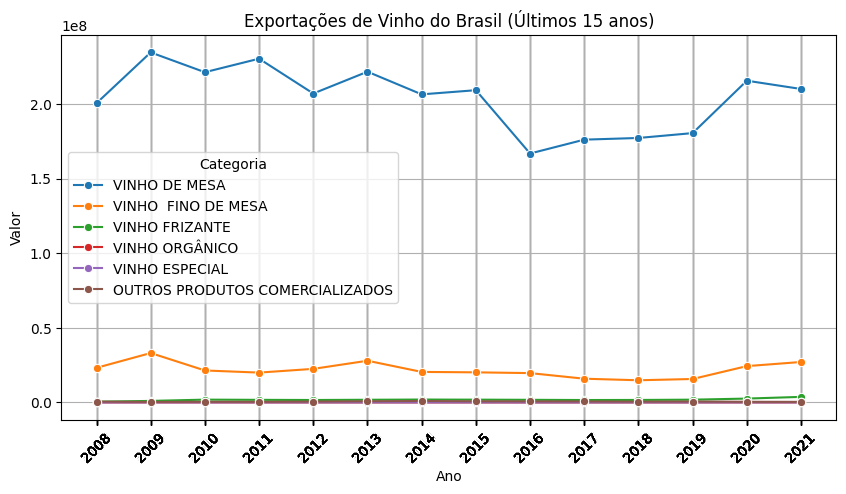

In [9]:
# Creating the plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_comercio_vinhos_melted, x='Ano', y='Valor', hue='Categoria', marker="o")

# Setting the titles and labels
plt.title('Exportações de Vinho do Brasil (Últimos 15 anos)')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(True)

# Ensuring that one year is represented per grid line
plt.xticks(ticks=df_comercio_vinhos_melted['Ano'], labels=df_comercio_vinhos_melted['Ano'])

# Displaying the plot
plt.show()

### Exportação

In [10]:
df_ultimos_15_anos = df_exportacao_total[df_exportacao_total['ano'] >= 2007]

#### Evolução das Exportações ao Longo do Tempo:
Este gráfico de linhas mostra como as exportações totais mudaram ano a ano nos últimos 15 anos. Cada ponto na linha representa o valor total exportado em um ano específico, e a linha conecta esses pontos para mostrar a tendência ao longo do tempo. Este gráfico ajuda a identificar padrões ou anomalias nas exportações ao longo dos anos e pode ser útil para entender se existe uma tendência de crescimento, declínio ou estabilidade nas exportações.

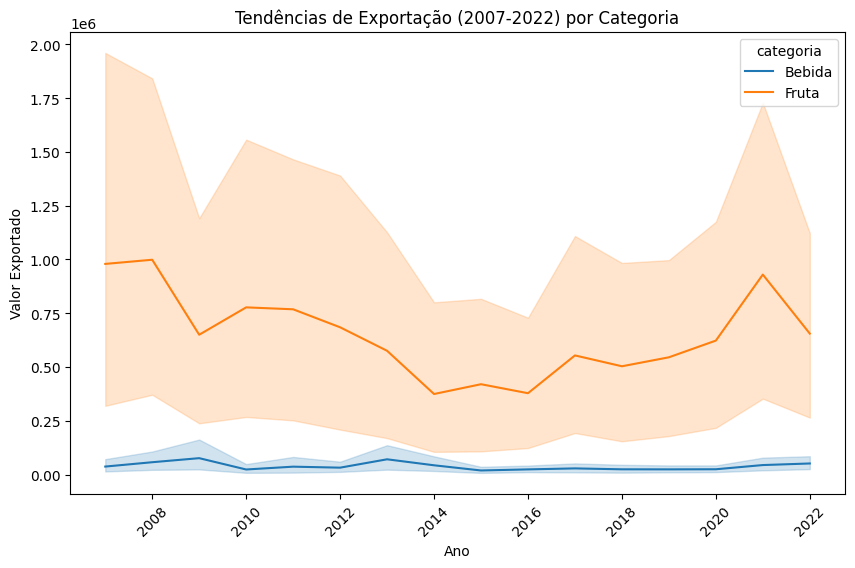

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ultimos_15_anos, x="ano", y="valor", hue="categoria")
plt.title('Tendências de Exportação (2007-2022) por Categoria')
plt.ylabel('Valor Exportado')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.show()


#### Distribuição de Exportações por País Destino (2007-2022) - Top 10 Países
Este gráfico de barras exibe os dez países para os quais o Brasil mais exportou nos últimos 15 anos. O eixo X mostra os países, e o eixo Y mostra o valor total exportado para cada país. As barras são proporcionais aos valores exportados. Este gráfico é útil para identificar os principais destinos das exportações brasileiras e entender quais países têm a maior participação no mercado de exportação.

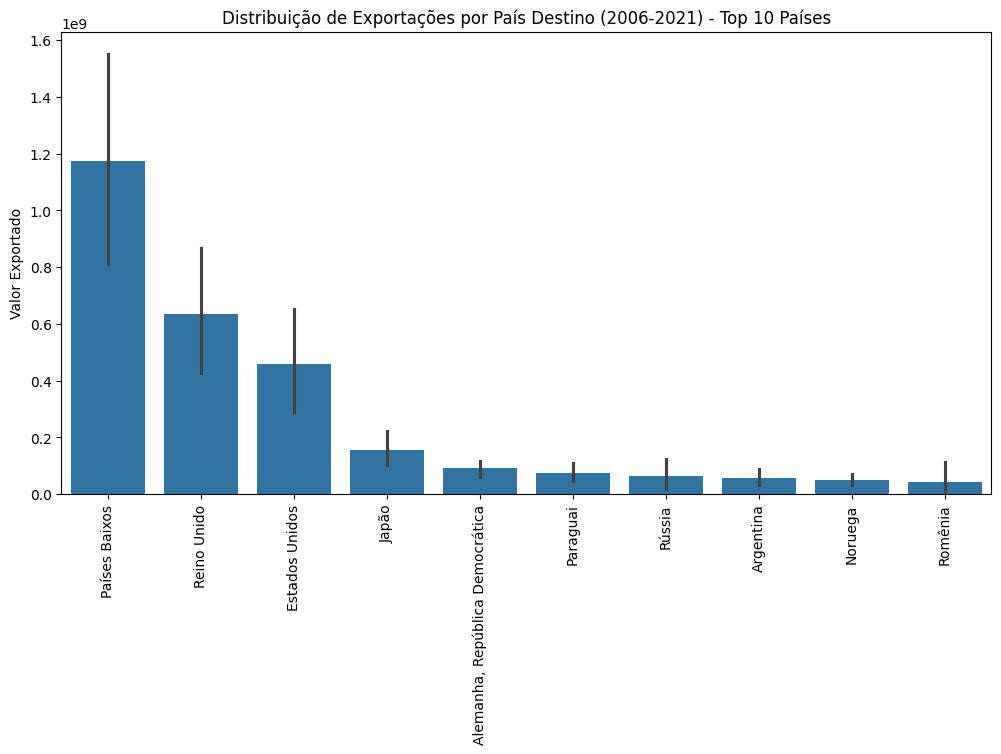

In [12]:
df_soma_por_pais = df_ultimos_15_anos.groupby('País')['valor'].sum().reset_index()

top_10_paises = df_soma_por_pais.sort_values(by='valor', ascending=False).head(10)

df_top_10_paises = df_ultimos_15_anos[df_ultimos_15_anos['País'].isin(top_10_paises['País'])]

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_10_paises, x="País", y="valor", estimator=sum, order=top_10_paises['País'])
plt.title('Distribuição de Exportações por País Destino (2006-2021) - Top 10 Países')
plt.ylabel('Valor Exportado')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()


#### Proporção de Exportações por Categoria de Produto (2007-2022):
Este gráfico de pizza mostra a proporção do valor total exportado atribuída a cada categoria de produto nos últimos 15 anos. Cada fatia da pizza representa uma categoria de produto, e o tamanho da fatia é proporcional ao valor total exportado para essa categoria. As porcentagens em cada fatia indicam a participação de cada categoria no total de exportações. Este gráfico ajuda a visualizar rapidamente quais categorias são mais significativas em termos de valor exportado.

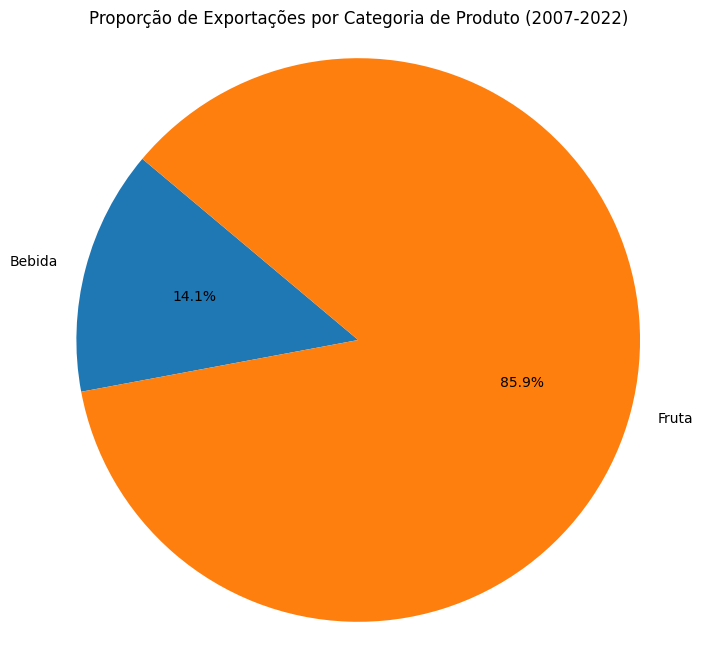

In [13]:
df_soma_por_categoria = df_ultimos_15_anos.groupby('categoria')['valor'].sum()

plt.figure(figsize=(8, 8))
plt.pie(df_soma_por_categoria, labels=df_soma_por_categoria.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Proporção de Exportações por Categoria de Produto (2007-2022)')
plt.show()

#### Correlação entre Anos e Valores Exportados:
Este mapa de calor mostra a correlação entre diferentes variáveis no dataframe. Cada célula no mapa de calor representa a correlação entre duas variáveis, e a cor da célula indica a força e a direção da correlação (cores mais quentes indicam correlação positiva, cores mais frias indicam correlação negativa). Este gráfico é útil para identificar relações entre diferentes variáveis e pode ajudar a entender quais fatores estão mais fortemente associados a valores de exportação mais altos ou mais baixos.

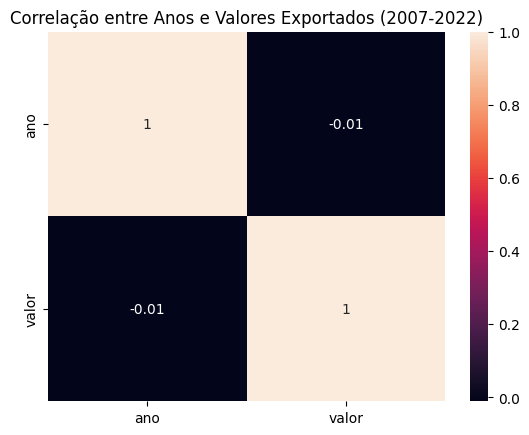

In [14]:
corr_matrix = df_ultimos_15_anos[['ano', 'valor']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlação entre Anos e Valores Exportados (2007-2022)')
plt.show()

Análise Estatística Descritiva:

In [15]:
desc_stats = df_ultimos_15_anos['valor'].describe()
print(desc_stats)

count    1.526400e+04
mean     2.017032e+05
std      2.304413e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+02
max      8.097690e+07
Name: valor, dtype: float64
